In [1]:
import json
import os
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
import pandas as pd


# NLTK Packages --------------------------------------------------------
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
from nltk.corpus import stopwords
# NLTK Packages --------------------------------------------------------


/Users/vihangajayalath/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vihangajayalath/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
twitter_json_file = '/TestData/smallTwitter.json'

def Load_Data(json_file):
    try:
        twitter_data_json = open(json_file, 'r')
        start_pos = 0
        tweet_texts = []

        file_size = twitter_data_json.seek(0, os.SEEK_END)

        while start_pos < file_size:
            twitter_data_json.seek(start_pos)
            tweet_data_line = twitter_data_json.readline()
            json_format = re.findall(r'^\{"id":.+,"key"\:.+,"value"\:.+"properties"\:.+"doc"\:.+"location"\:"melbourne"\}\}', tweet_data_line)

            start_pos = twitter_data_json.tell()

            if len(json_format) != 0:
                tweet_data_dict = {}
                load_tweet_data = json.loads(json_format[0])
                if 'en' in load_tweet_data['doc']['lang']:
                    cleaned_tweet_text = Clean_Tweets(load_tweet_data['value']['properties']['text'])
                    tweet_texts.append(cleaned_tweet_text)

        return tweet_texts

    except:
        return "Invalid File!"

def Clean_Tweets(data):
    tweet_text_noLinks = (re.sub(r'(https:\/\/t\.co\/[\/\.a-z0-9]+)|(http:[\/\.a-z0-9]+)', ' ', (data).lower()))
    tweet_text_noPunc_noLinks = (re.sub(r'[,\.!?\/\;\:\#\\\'\"]', ' ', tweet_text_noLinks))
    tweet_text_noPunc_noLinks = re.sub(r'(\\n)|(\\t)|[\(\)\\]', ' ', tweet_text_noPunc_noLinks)
    tweet_text_noPunc_noLinks_noUser = re.sub(r'\@\w+', ' ', tweet_text_noPunc_noLinks)

    return tweet_text_noPunc_noLinks_noUser


json_tweet_data = Load_Data(twitter_json_file)

In [3]:
def Plot_WordCloud(data):
    # Join the different processed titles together.
    long_string = ','.join(data)

    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=3, contour_color='steelblue')

    # Generate a word cloud
    wordcloud.generate(long_string)

    # Visualize the word cloud
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    # wordcloud.to_image()

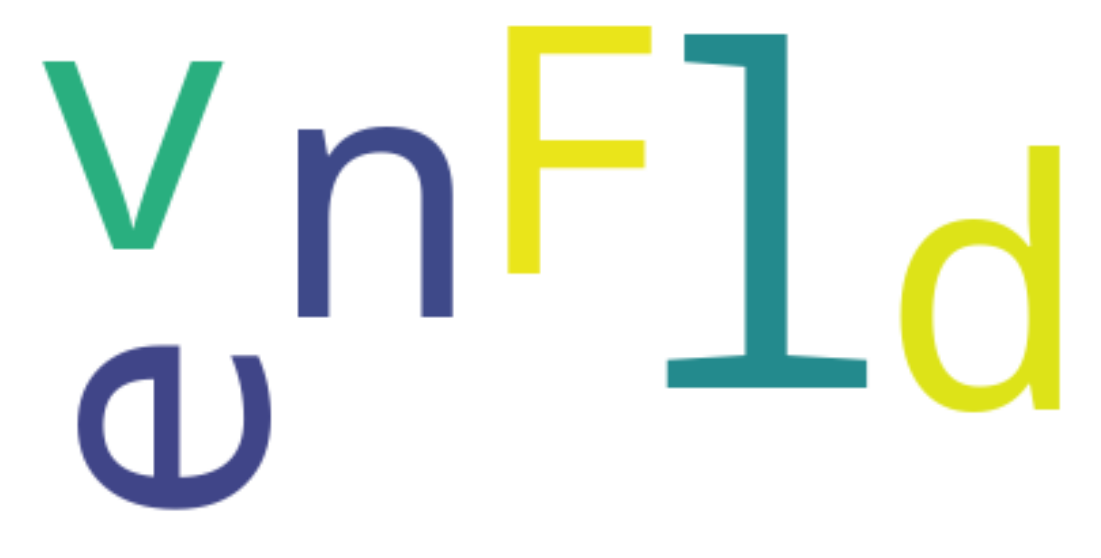

In [4]:
Plot_WordCloud(json_tweet_data)

In [5]:
twitter_kaggle_data = pd.read_csv('/TestData/twitter_sentiment_kaggle.csv', header=None)
twitter_kaggle_data['Cleaned_Tweet_Text'] = twitter_kaggle_data[5].apply(lambda x: Clean_Tweets(x))
twitter_texts = twitter_kaggle_data['Cleaned_Tweet_Text'].values

FileNotFoundError: [Errno 2] No such file or directory: '/TestData/twitter_sentiment_kaggle.csv'

In [ ]:
twitter_kaggle_data

In [ ]:
twitter_texts

In [ ]:
len(twitter_texts)

In [ ]:
Plot_WordCloud(twitter_texts[:100000])

In [ ]:
apple_support_tweets = pd.read_csv('/TestData/apple_support_tweets.csv')
apple_support_tweets['Cleaned_Tweet_Text'] = apple_support_tweets['text'].apply(lambda x: Clean_Tweets(x))

apple_support_tweet_texts = apple_support_tweets['Cleaned_Tweet_Text']

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


# data_words = list(sent_to_words(json_tweet_data))
# data_words = list(sent_to_words(twitter_texts[:500000]))
data_words = list(sent_to_words(apple_support_tweet_texts[:500000]))


# remove stop words
data_words = remove_stopwords(data_words)

# print(data_words[:1][0][:30])
print(data_words)

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
# print(corpus[:1][0][:30])
# print(corpus)

In [ ]:
# number of topics
num_topics = 20

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
data_words = list(sent_to_words(twitter_texts[:500000]))

# remove stop words
data_words = remove_stopwords(data_words)

id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# number of topics
num_topics = 20

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
data_words = list(sent_to_words(json_tweet_data))

# remove stop words
data_words = remove_stopwords(data_words)

id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# number of topics
num_topics = 20

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                    id2word=id2word,
                                    num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]